## IRIS Classification



In [1]:
# Importing the iris Dataset
from sklearn.datasets import load_iris


In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [5]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Here we could see that the iris data frame contains the length and width os sepals and petals including target column which is numerical representation of classes of Iris Flower that we need to classify(eg: Setosa(0),Versicolor(1),Virginica(2)).



#### Adding the Species Column 

In [6]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [7]:
iris.groupby('species').size()



species
setosa        50
versicolor    50
virginica     50
dtype: int64

Each number of classes has 50 instances together consituting 150 in total.
<br />
Let's get certain relevant information 

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


### Data Analysis

#### 1. Plotting the Histogram for every column 

<Axes: >

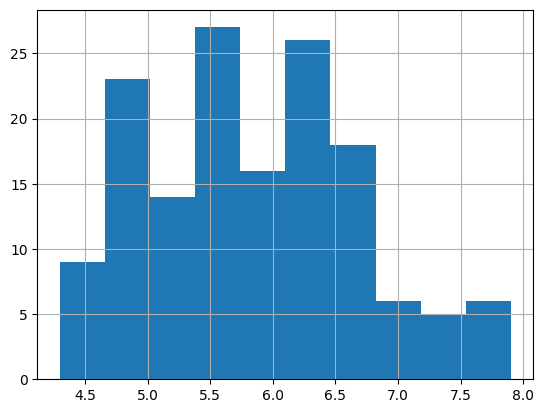

In [10]:
iris['sepal length (cm)'].hist()

<Axes: >

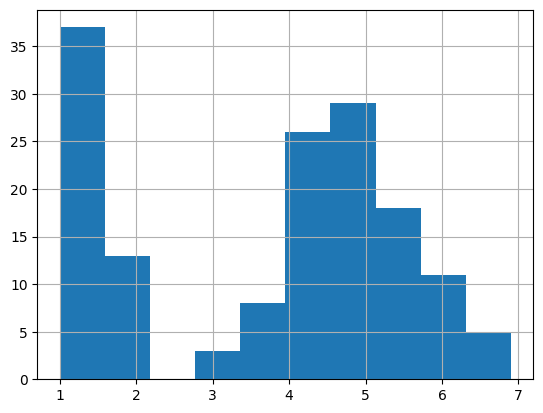

In [11]:
iris['petal length (cm)'].hist()

<Axes: >

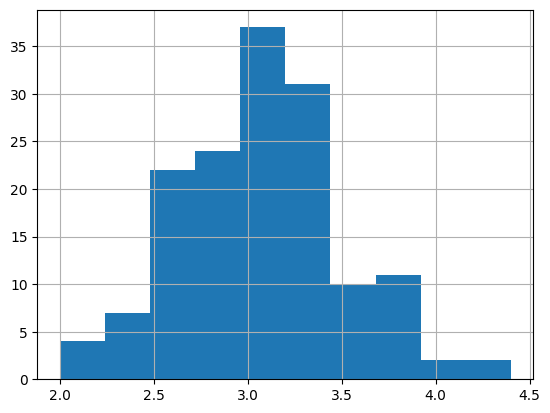

In [12]:
iris['sepal width (cm)'].hist()

<Axes: >

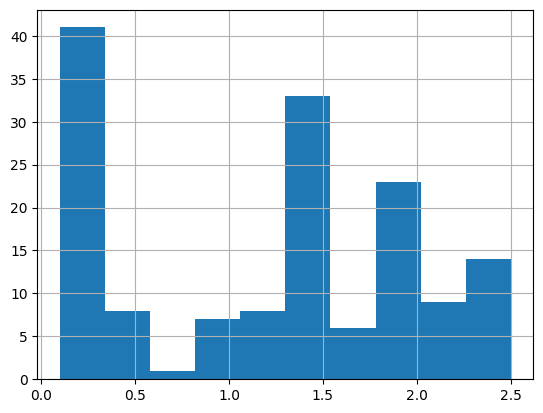

In [13]:
iris['petal width (cm)'].hist()

#### 2. Plotting the scatter plots 

In [14]:
colors=['red','green','blue']
species=['virginica','versicolor','setosa']

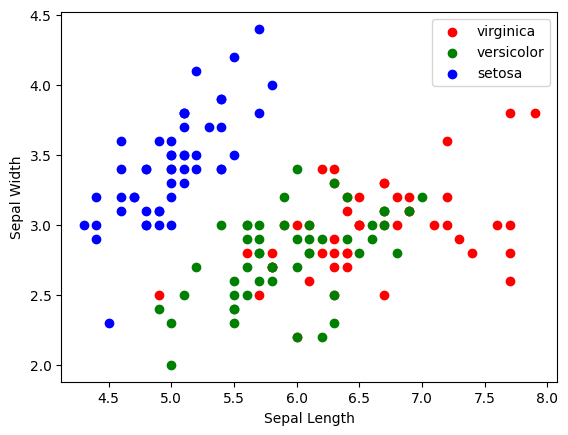

In [15]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal length (cm)'],x['sepal width (cm)'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

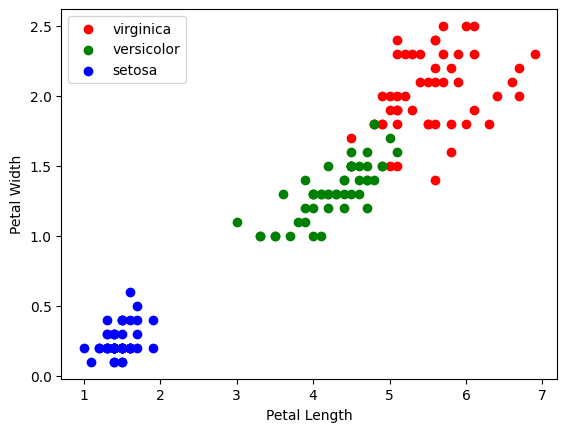

In [16]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

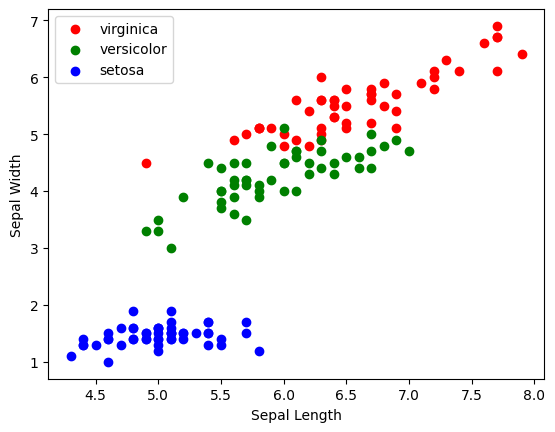

In [17]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal length (cm)'],x['petal length (cm)'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

### Co-relation Matrix

In [18]:
new_iris=iris.drop('species',axis=1)

In [19]:
new_iris=new_iris.drop('target',axis=1)

In [20]:
new_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
new_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

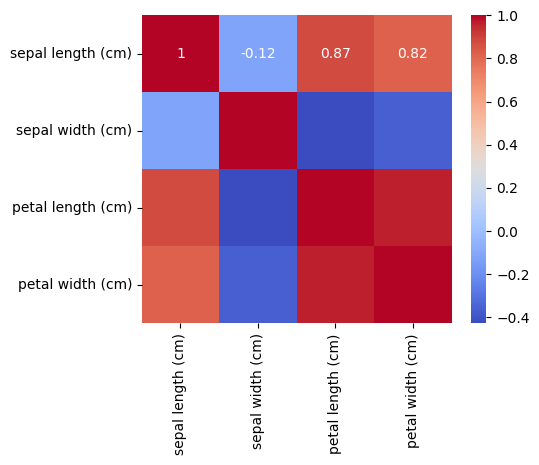

In [22]:
corr=new_iris.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

### Model Training and Testing 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data 
X=iris.drop(columns=['species','target'])
#output Data 
y=iris['species']

# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [24]:
y_train

6          setosa
63     versicolor
9          setosa
72     versicolor
115     virginica
          ...    
74     versicolor
149     virginica
112     virginica
24         setosa
38         setosa
Name: species, Length: 105, dtype: object

#### Logistic Regression

In [25]:
model=LogisticRegression()
model.fit(X_train,y_train)
print("Logistic Regression Accuracy : ",model.score(X_test,y_test)*100)

Logistic Regression Accuracy :  95.55555555555556


In [26]:
# model training 
model.fit(X_train.values,y_train.values)

LogisticRegression()

In [27]:
# printing the metric to get the performance
print("Accuracy : ",model.score(X_test,y_test)*100)

Accuracy :  95.55555555555556


#### K-Nearest Neighbours 

In [28]:
# K -Nearest Neighbours 

model=KNeighborsClassifier()
model.fit(X_train.values,y_train.values)
print("K-Nearest Neighbours Accuracy: ",model.score(X_test,y_test)*100)

K-Nearest Neighbours Accuracy:  95.55555555555556


In [29]:
model.fit(X_train.values,y_train.values)

KNeighborsClassifier()

#### Decision Tree Classifier

In [30]:
model=DecisionTreeClassifier()
model.fit(X_train.values,y_train.values)
print("Decision Tree Accuracy: ",model.score(X_test,y_test)*100)

Decision Tree Accuracy:  82.22222222222221


### Save The Model

In [31]:
import pickle
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))


In [32]:
load_model=pickle.load(open(filename,'rb'))

In [33]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)